##**Comparison Analysis of Pedestrian Detection Scenarios Using SIFT and HOG**

###**Scenario 1: Pedestrian Detection Using SIFT for Keypoint Matching**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img1 = cv2.imread('pedestrian1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('pedestrian2.jpg', cv2.IMREAD_GRAYSCALE)

In [3]:
# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

In [4]:
# Use FLANN-based matcher for better accuracy
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [5]:
# Match descriptors using KNN
matches = flann.knnMatch(descriptors1, descriptors2, k=2)

# Apply Lowe's ratio test to filter good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Draw matches
img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)


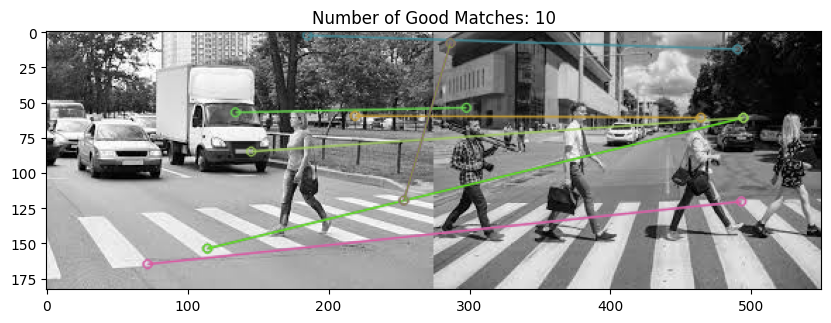

In [6]:
# Display the result
plt.figure(figsize=(10, 5))
plt.imshow(img_matches, cmap='gray')
plt.title(f"Number of Good Matches: {len(good_matches)}")
plt.show()

###**Scenario 2: Pedestrian Detection Using HOG for Pedestrian Detection**

In [7]:
##use images loaded in previous scenario
# Initialize HOG descriptor with pre-trained pedestrian detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

In [8]:
def detect_pedestrians(image):
    # Resize image to improve detection speed and accuracy
    image_resized = cv2.resize(image, (600, 400))

    # Detect pedestrians (returns bounding boxes)
    boxes, weights = hog.detectMultiScale(image_resized, winStride=(4, 4), padding=(8, 8), scale=1.05)

    # Draw bounding boxes
    for (x, y, w, h) in boxes:
        cv2.rectangle(image_resized, (x, y), (x + w, y + h), (0, 255, 0), 3)

    return image_resized

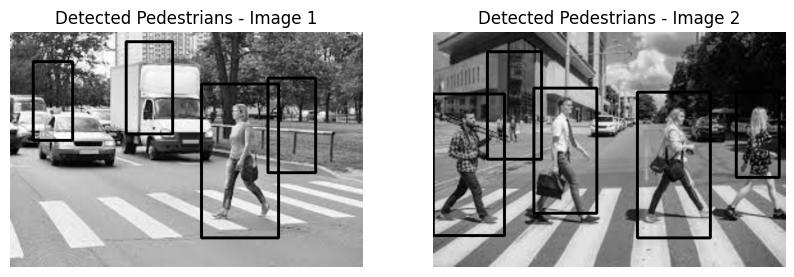

In [9]:
img1_result = detect_pedestrians(img1)
img2_result = detect_pedestrians(img2)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1_result, cv2.COLOR_BGR2RGB))
plt.title("Detected Pedestrians - Image 1")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2_result, cv2.COLOR_BGR2RGB))
plt.title("Detected Pedestrians - Image 2")
plt.axis("off")

plt.show()